In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("Car_Price_Prediction.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [17]:
#Data replace in CarName column

df.CarName = df.CarName.str.replace('maxda','mazda')

In [18]:
df.CarName = df.CarName.str.replace('nissan','Nissan')
df.CarName = df.CarName.str.replace('porsche','porcshce')
df.CarName = df.CarName.str.replace('toyouta','toyota')
df.CarName = df.CarName.str.replace('vokswagen',' volkswagen')


In [19]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


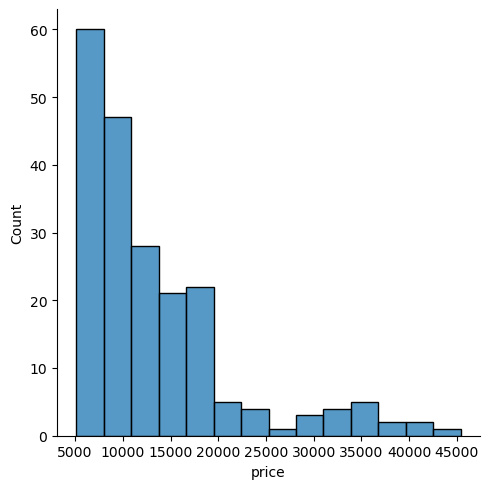

In [20]:
# create the distribution plot with CarColumn
sns.displot(df['price'])


In [21]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


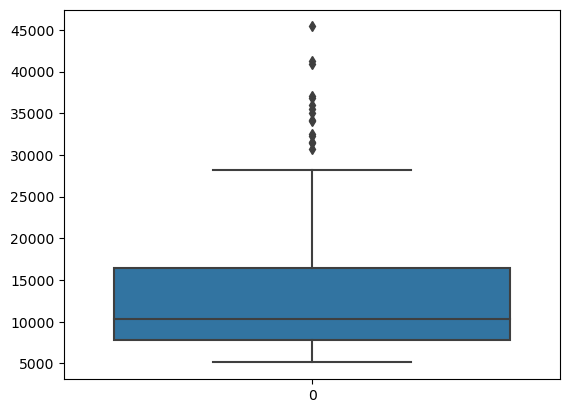

In [22]:
#Create a Boxplot with car price column

sns.boxplot(data = df.price, orient='vertical')
plt.show()

In [23]:
#we can see clearly, some outliers are present in price 

In [24]:
Q1,Q3 = df.price.quantile([0.25,0.75])
Q1,Q3

(7788.0, 16503.0)

In [25]:
df[df.price == max(df.price)]  #To check max price in our dataframe

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.8,3.35,8.0,184,4500,14,16,45400.0


In [26]:
#Interquantile Range

IQR = Q3 - Q1
IQR

8715.0

In [27]:
UL = Q3+1.5*(IQR)
LL = Q1-1.5*(IQR)

In [28]:
UL

29575.5

In [29]:
LL

-5284.5

In [30]:
#we would check those value which are above Upper Limit
df[df.price>UL] 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0


In [31]:
#we have to replace outliears with UL and LL
df.price = np.where(df.price>UL,UL,df.price)

In [32]:
df.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

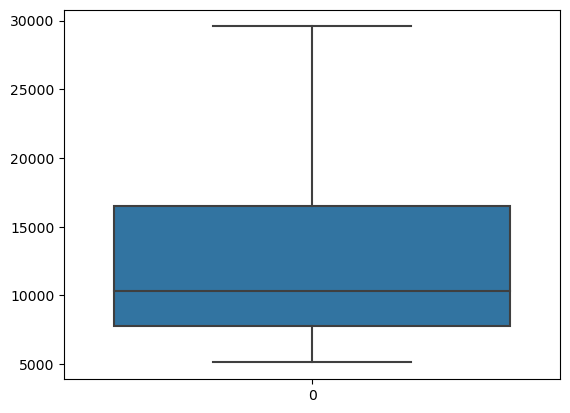

In [33]:
sns.boxplot(data=df.price,orient='vertical')
plt.show()

In [34]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,12831.310571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,6716.631714
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,29575.500000


In [35]:
df1= df.skew()
df1

C:\Users\HP\AppData\Local\Temp\ipykernel_15804\1204729338.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1= df.skew()


car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.222031
dtype: float64

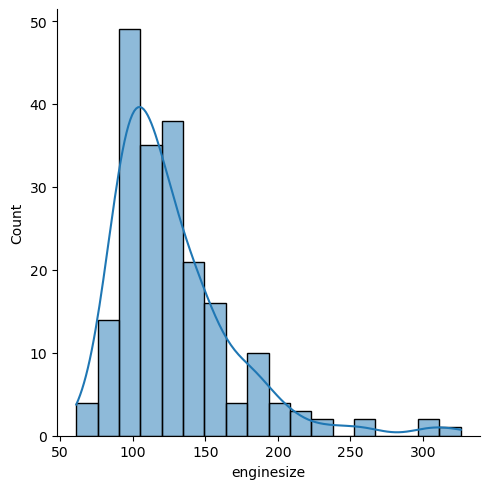

In [36]:
sns.displot(df.enginesize,kde=True)
plt.show()

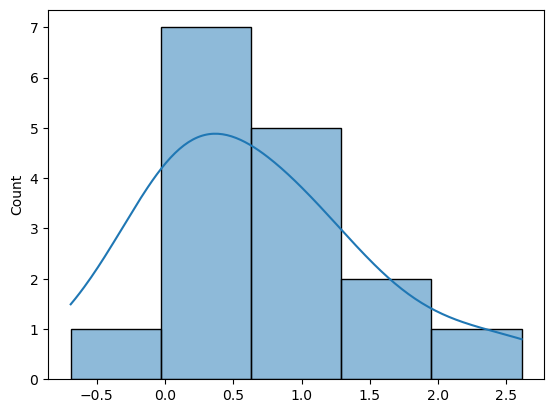

In [37]:
sns.histplot(data=df1,kde=True)
plt.show()

In [38]:
#Columns that has Positive correlation with Price Column.

df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.089603
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.092705
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.601109
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.712455
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.785024
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.142033
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.864597
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.842251
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.572685
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.085907


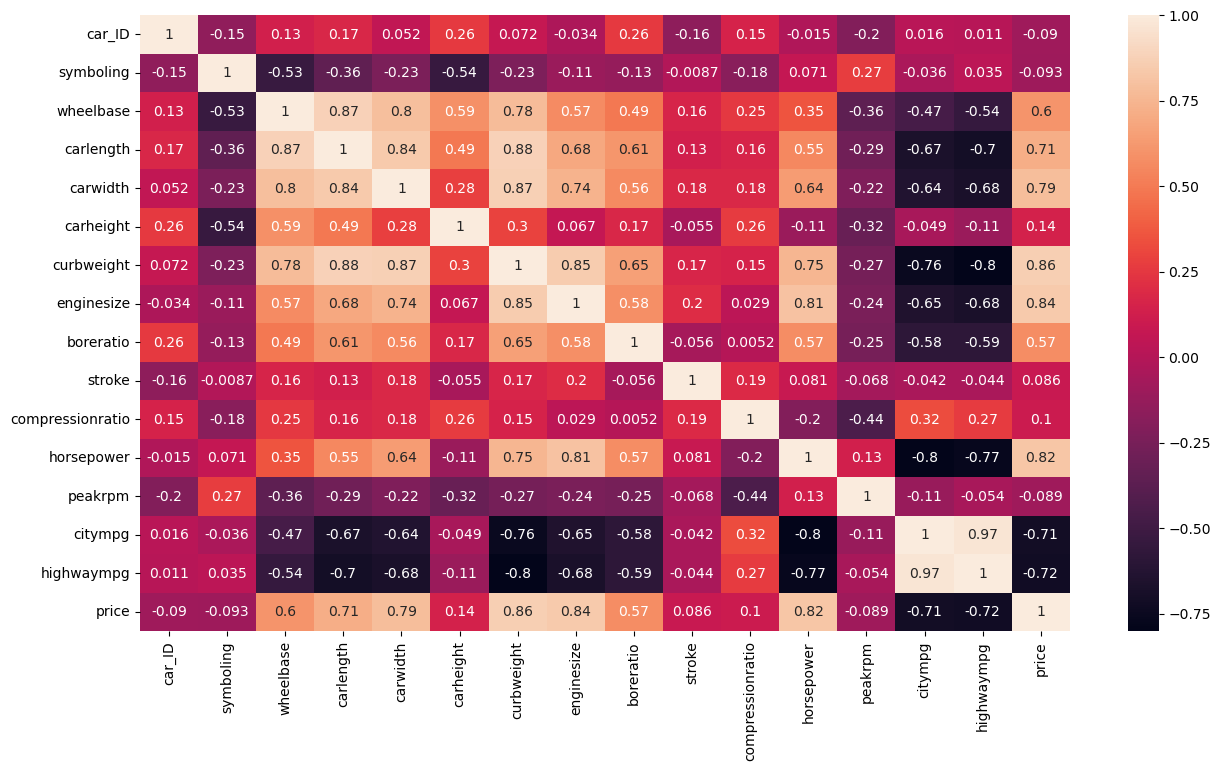

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

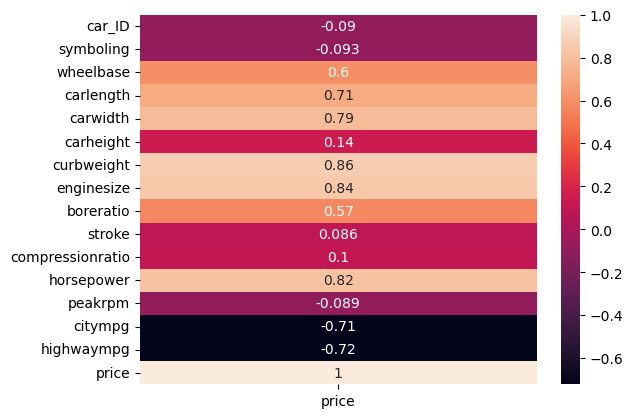

In [40]:
co = df.corr()
sns.heatmap(co[['price']],annot=True)
plt.show()

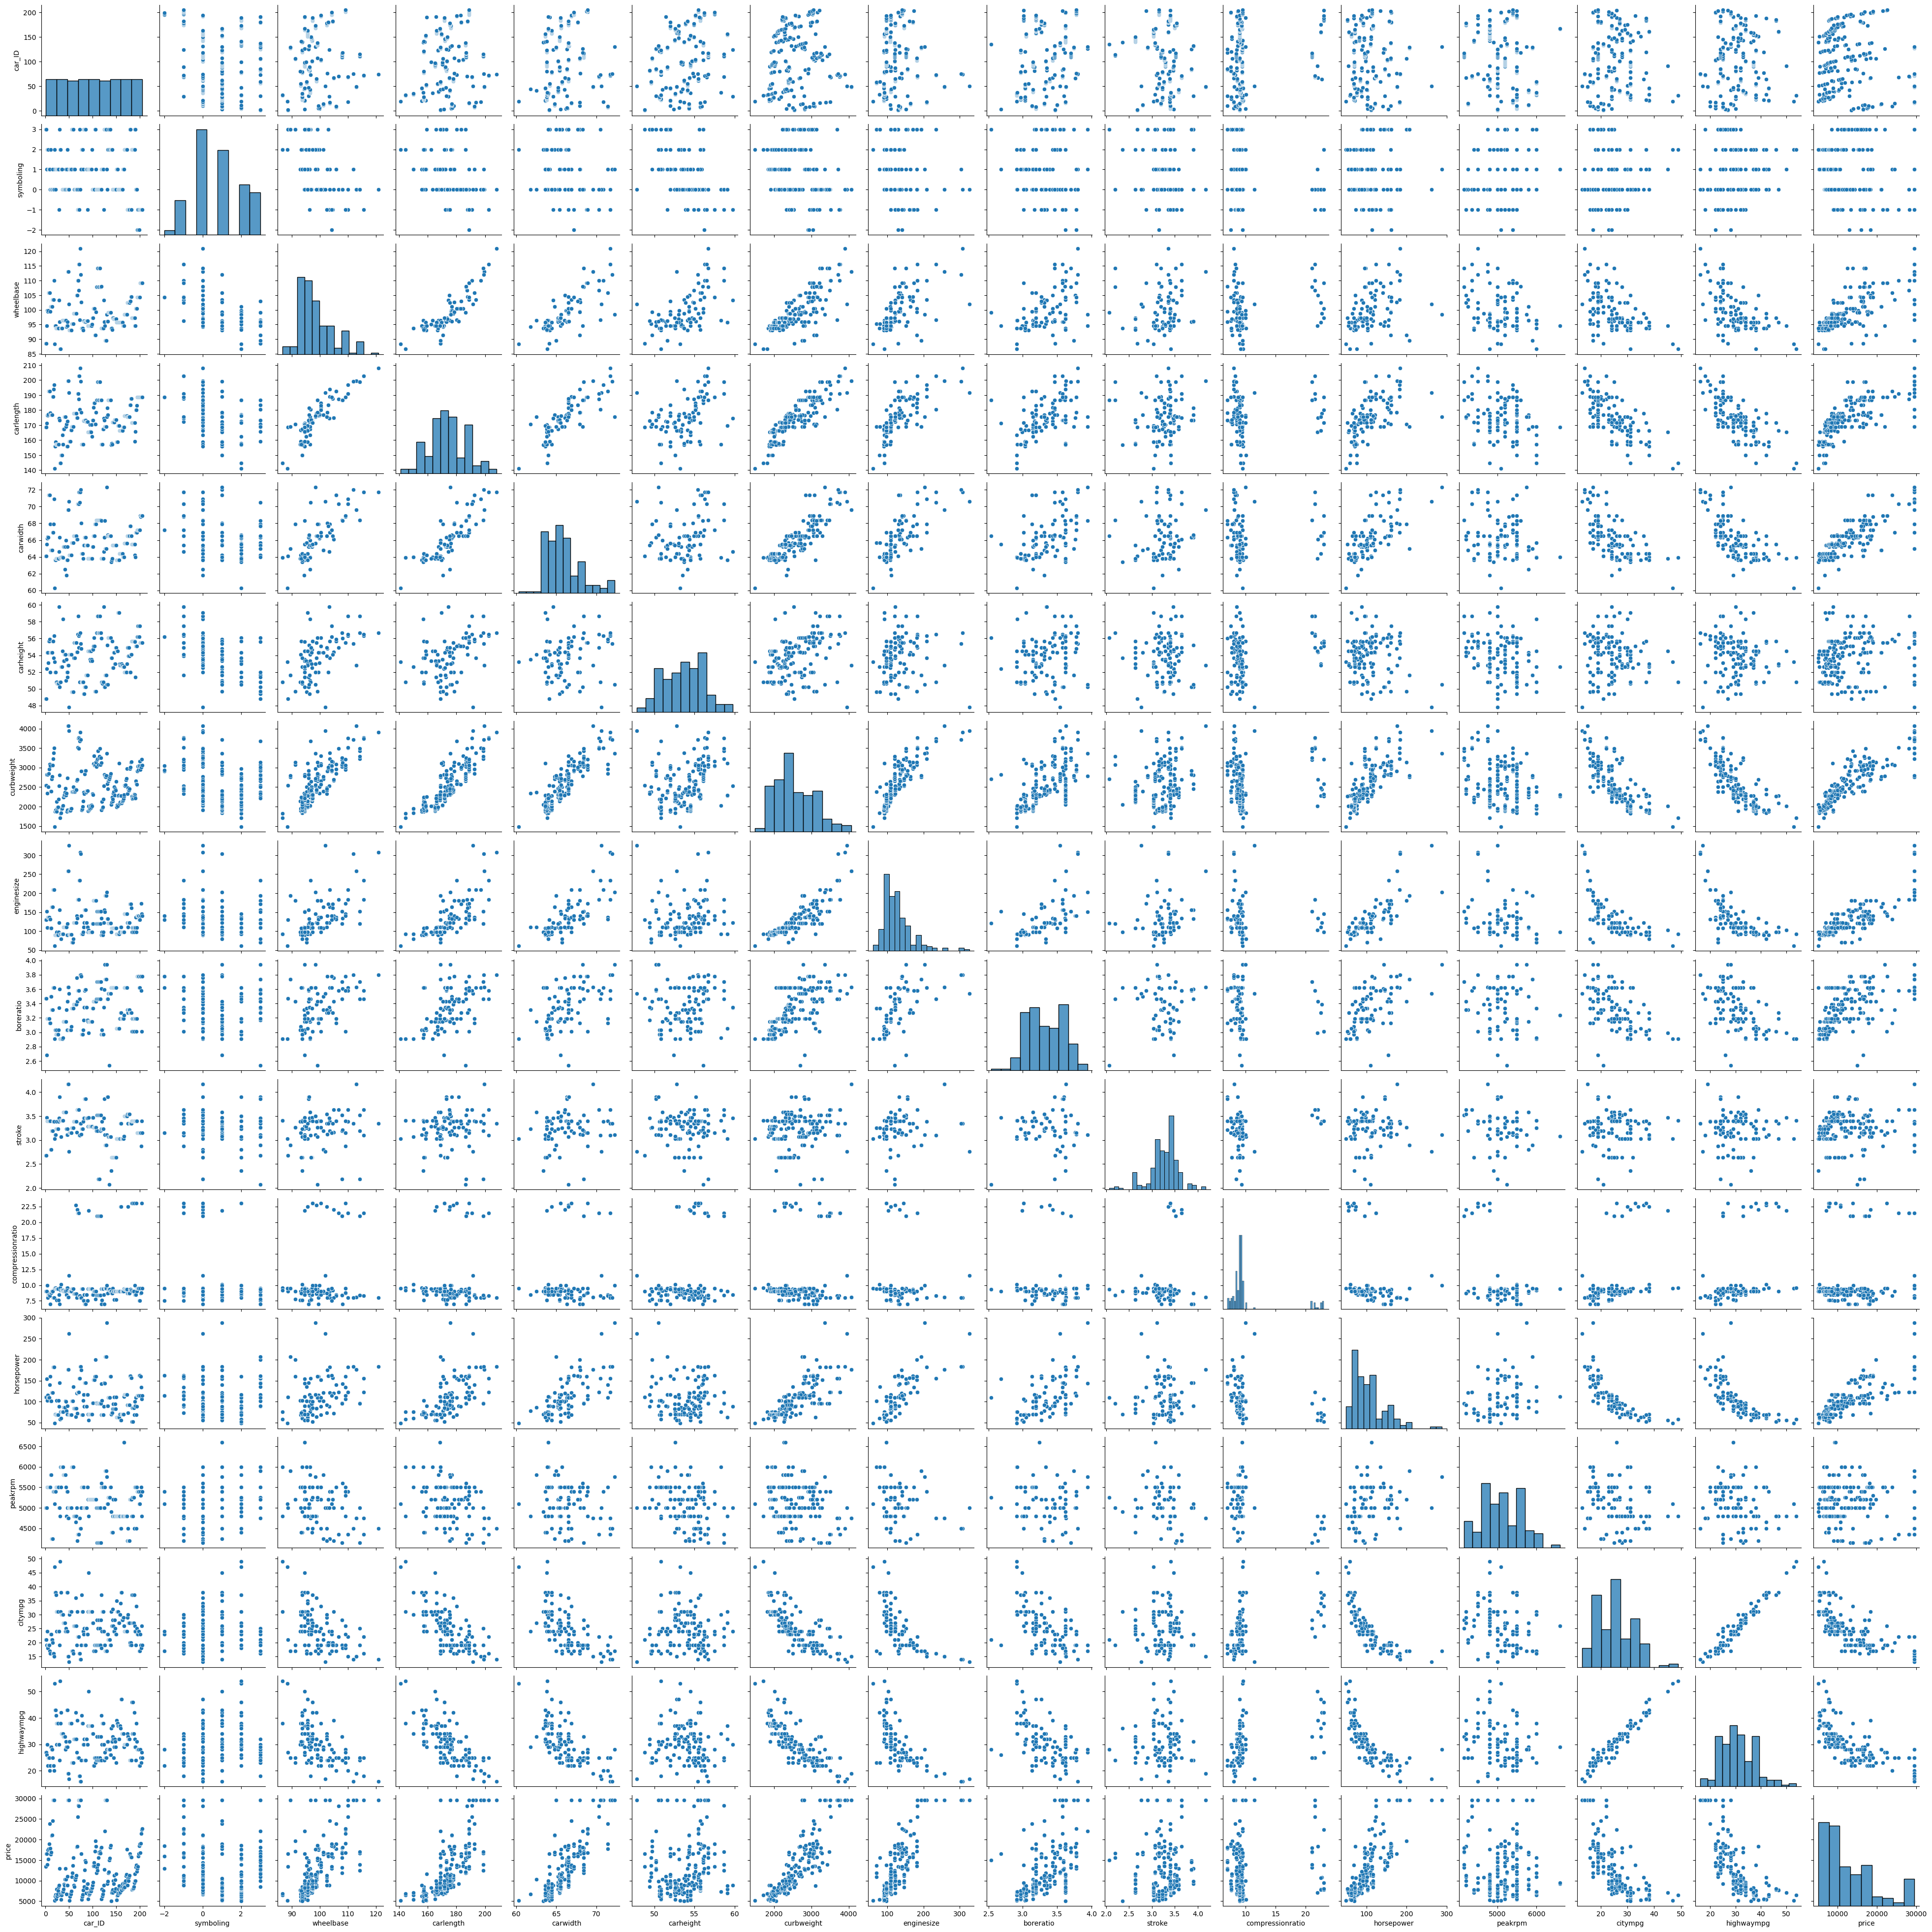

In [29]:
#Create a Pair Plot with whole dataset
sns.pairplot(df)
plt.show()

In [41]:
#wheelbase,carlenth,carwidth,curbweight,enginesize,boreratio,horsepower
#These are my independent variable

# I'm extracting multiple columns from the dataframe
new_df = df.loc[:, ['enginesize','curbweight','horsepower','carwidth','carlength','wheelbase','boreratio']]
new_df

,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio
0,130,2548,111,64.1,168.8,88.6,3.47
1,130,2548,111,64.1,168.8,88.6,3.47
2,152,2823,154,65.5,171.2,94.5,2.68
3,109,2337,102,66.2,176.6,99.8,3.19
4,136,2824,115,66.4,176.6,99.4,3.19
...,...,...,...,...,...,...,...
200,141,2952,114,68.9,188.8,109.1,3.78
201,141,3049,160,68.8,188.8,109.1,3.78
202,173,3012,134,68.9,188.8,109.1,3.58
203,145,3217,106,68.9,188.8,109.1,3.01


In [42]:
x=new_df    #indepedent variable for model
x

,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio
0,130,2548,111,64.1,168.8,88.6,3.47
1,130,2548,111,64.1,168.8,88.6,3.47
2,152,2823,154,65.5,171.2,94.5,2.68
3,109,2337,102,66.2,176.6,99.8,3.19
4,136,2824,115,66.4,176.6,99.4,3.19
...,...,...,...,...,...,...,...
200,141,2952,114,68.9,188.8,109.1,3.78
201,141,3049,160,68.8,188.8,109.1,3.78
202,173,3012,134,68.9,188.8,109.1,3.58
203,145,3217,106,68.9,188.8,109.1,3.01


In [43]:
y=df.price
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [44]:
# Training and Testing for Data
# import library to train and test automatically

from sklearn.model_selection import train_test_split


In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=105)

In [46]:
x_train

,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio
149,108,2650,111,65.4,173.6,96.9,3.62
14,164,3055,121,66.9,189.0,103.5,3.31
191,136,2661,110,66.9,180.2,100.4,3.19
168,146,2536,116,65.6,176.2,98.4,3.62
26,90,1989,68,63.8,157.3,93.7,2.97
...,...,...,...,...,...,...,...
32,79,1837,60,64.0,150.0,93.7,2.91
73,308,3900,184,71.7,208.1,120.9,3.80
22,90,1876,68,63.8,157.3,93.7,2.97
117,134,3130,142,68.3,186.7,108.0,3.61


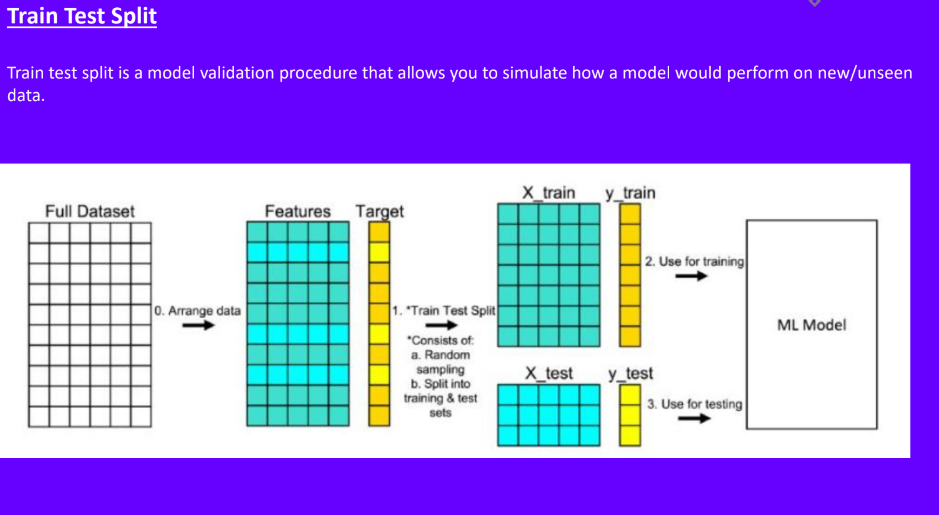

In [47]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(143, 7) (143,)
(62, 7) (62,)


In [48]:
#import linearregression

from sklearn.linear_model import LinearRegression

In [49]:
# Putting that algorithm into an instance (Variable)

lr = LinearRegression()

In [50]:
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(x_test)

In [52]:
lr.predict([[108,2650,111,65.4,173.6,96.9,3.6]])

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12106.17818326])

In [53]:
data = pd.DataFrame({'enginesize':x_test.enginesize,'curbweight':x_test.curbweight,'horsepower':x_test.horsepower,'carwidth':x_test.carwidth,'carlength':x_test.carlength,'wheelbase':x_test.wheelbase,'boreratio':x_test.boreratio,'Actual_Values':y_test,
                   'Predicted_Values':y_pred.round(2)})

In [54]:
data

,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,Actual_Values,Predicted_Values
48,258,4066,176,69.6,199.6,113.0,3.63,29575.5,30072.10
93,97,2024,69,63.8,170.2,94.5,3.15,7349.0,6810.40
74,304,3715,184,72.0,199.2,112.0,3.80,29575.5,31476.96
43,111,2337,78,61.8,170.7,94.3,3.31,6785.0,7816.36
37,110,2236,86,65.2,167.5,96.5,3.15,7895.0,9857.66
...,...,...,...,...,...,...,...,...,...
49,326,3950,262,70.6,191.7,102.0,3.54,29575.5,37298.40
203,145,3217,106,68.9,188.8,109.1,3.01,22470.0,19128.74
108,152,3197,95,68.4,186.7,107.9,3.70,13200.0,16720.18
167,146,2540,116,65.6,176.2,98.4,3.62,8449.0,13522.65


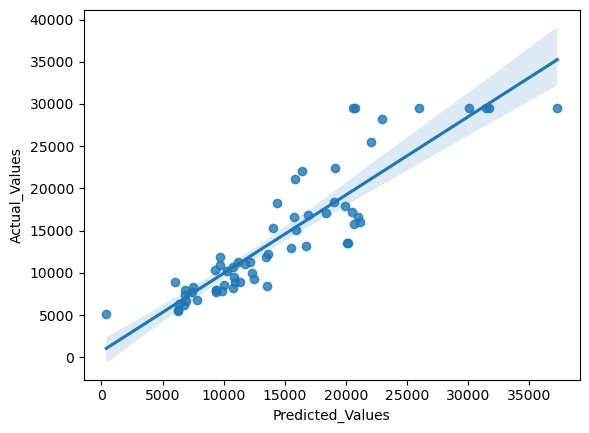

In [55]:
sns.regplot(x=data.Predicted_Values,y=data.Actual_Values)
plt.show()

In [56]:
# Model Evaluation

from sklearn.metrics import r2_score

In [58]:
r2_score(data.Actual_Values,data.Predicted_Values)

0.7981315298607228

In [61]:
#Most favoured car company.
counts=df['CarName'].value_counts().head()
counts

toyota corona       6
toyota corolla      6
peugeot 504         6
subaru dl           4
mazda glc deluxe    3
Name: CarName, dtype: int64

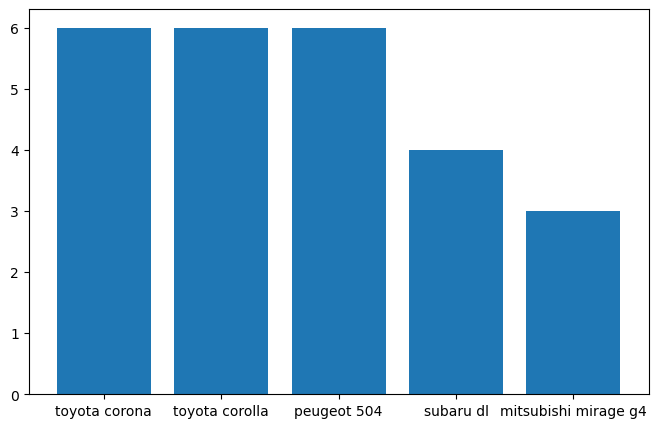

In [7]:
plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values)
plt.show()

In [62]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [63]:
#Most preferred Car according to type.

co = df['fueltype'].value_counts()

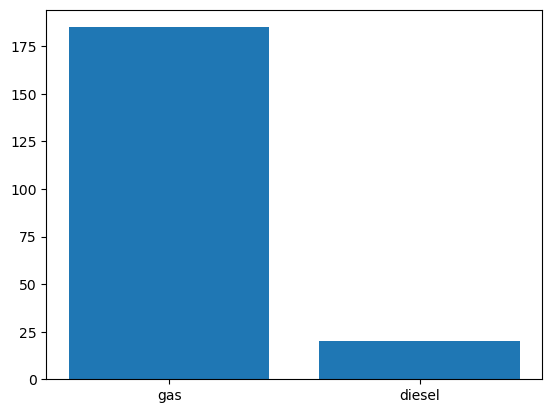

In [51]:
plt.bar(co.index, co.values)
plt.show()

In [64]:
# Most Favoured Engine
count = df['enginetype'].value_counts()
count

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

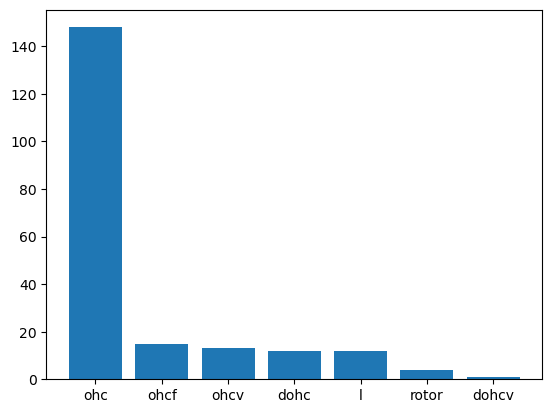

In [54]:
plt.bar(count.index, count.values)
plt.show()

In [65]:
# Highest Average Price of Car
highest_avg_price = df.groupby('CarName')['price'].mean().max()
print(highest_avg_price)

29575.5


In [66]:
#Which cars has highest average price (Gas or Deisel)
df.groupby('fueltype')['price'].mean()

fueltype
diesel    15736.925000
gas       12517.190092
Name: price, dtype: float64

In [68]:
# Most common number of cylinder
cos = df['cylindernumber'].value_counts()
cos

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

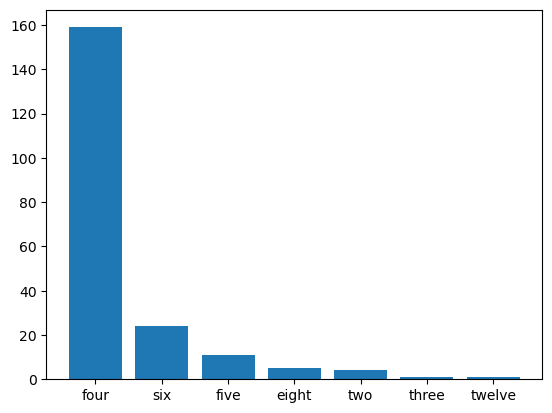

In [69]:
plt.bar(cos.index, cos.values)
plt.show()

In [70]:
#Most common type of fuel systems
cu = df['fuelsystem'].value_counts()
cu

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

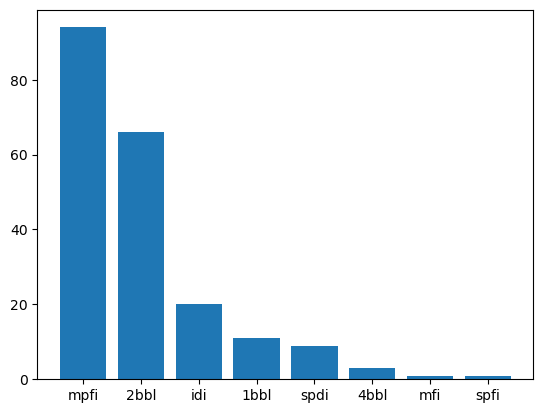

In [61]:
plt.bar(cu.index, cu.values)
plt.show()